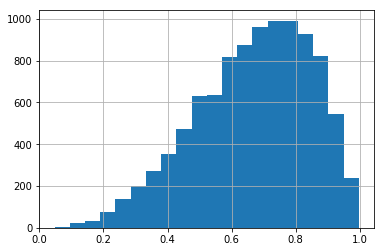

Roots: [ 0.01172752  0.05769134  0.125       0.19230866  0.23827248  0.26172752
  0.30769134  0.375       0.44230866  0.48827248]
Quantiles on Roots: [ 0.22716868  0.35317806  0.44305182  0.50492822  0.5369141   0.55445321
  0.58480104  0.62273678  0.65977156  0.68299927]


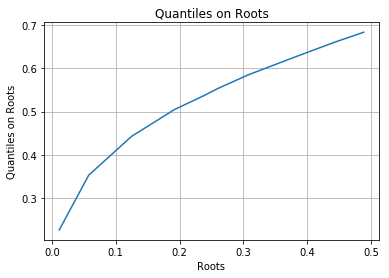

details for i=0,...,2:[ 0.00047471 -0.00649016  0.00024272  0.00369445]

sum(details)=-0.002078270355313107,
sum(|details|)=0.010902040737106279


In [2]:
# test for wavelets details

# load pandas
import pandas as pd
# load numpy
import numpy as np
#import math
import matplotlib.pyplot as plt
#own
import ppath # don't forget to run writeppath.py before
import aMRPC.polytools as pt
import aMRPC.wavetools as wt

# data location
url='../data/InputParameters.txt'

# load data
dataframe=pd.read_csv(url,header=None,sep='\s+ ',engine='python')
Nr=1
Nri=0
No=3
src=0

data=dataframe[src]
#q=data.quantile(0.5)
#b=data>=q
#data=data[b]
plt.hist(data,20)
plt.grid(True)
plt.show()
wv=wt.WaveTools(No+1)
wv.genWVlets()
r=np.copy(wv.roots)
if Nr>0:
    r=wv.rescY(r,Nr,Nri)
len=r.shape[0]
QuantileOnRoots=np.zeros(len)

for i in range(len):
    QuantileOnRoots[i]=data.quantile(r[i])
print("Roots:",r)
print("Quantiles on Roots:",QuantileOnRoots)
plt.plot(r,QuantileOnRoots)
plt.grid(True)
plt.xlabel("Roots")
plt.ylabel("Quantiles on Roots")
plt.title("Quantiles on Roots")
plt.show()
details=wv.cmpDetails(QuantileOnRoots)
print("details for i=0,...,{}:{}\n".format(No-1,details))
print("sum(details)={},\nsum(|details|)={}".format(sum(details),sum(abs(details))))
